# How to Make Money Betting on March Madness using Machine Learning

Even above average sports bettors lose money betting on March Madness. A bettor must pick 52.4% of games correctly just to break even, because bookies collect a portion of bets placed. Can an above average machine learning model beat the spread?

I trained a machine learning model to predict the score difference between two opponents. The predictions from this model correctly picked a betting position in 65% of the games where the model identified an opportunity to bet on the spread. 

Using tournament games from 2010-2013, I determined the optimal betting strategy was to bet on games where the model's prediction varied by more than 3 points from the spread. I then simulated this betting strategy on tournaments from 2014-2019. The model placed bets on 16% of tournament games from 2014-2019 where the model's prediction was 3 points more or less than the spread.

The hypothetical bets placed are summarized in the figure below. Had I bet on these 62 games, I would have made \\$1,580 off \$6,820 in bets placed, a return of 23%.

Season | Games Bet On | Model Correct | Amount Bet | Amount Won/Lost 
--- | --- | --- | --- | --- | --- 
2014 | 13 | 77% | \\$1,430 | \\$670 
2015 | 14 | 64% | \\$1,540 | \\$350 
2016 | 8 | 62% | \\$880 | \\$170 
2017 | 17 | 53% | \\$1,870 | \\$20 
2018 | 4 | 75% | \\$440 | \\$190 
2019 | 6 | 67% | \\$660 | \\$180 
**Total** | **62** | **65%** | **\\$6,820** | **\\$1,580** 

**Introduction to Sports Betting**

In sports betting, the spread represents the difference in score between two opponents. For example, a spread of 2.5 for UVA favored against Duke means that UVA is expected to win by 2.5 points. A bettor has two options:

1. **Bet favorite covers:** Bet that UVA will win by more than 2.5 points (i.e., “cover the spread”)
2. **Bet favorite doesn't cover:** Bet that UVA will either (a) win by less than 2.5 points or (b) lose

Sports bettors typically must bet \\$110 to win \$100. A bettor can place a bet of \\$110 for UVA to cover. If UVA covers, the bettor gets \$210 back, winning \\$100. If UVA doesn’t cover, the bettor gets nothing back and loses the full $110. 

Therefore, the profit function is p x \\$100 + (1-p) x -$110, where p is the percentage of games picked correctly. I calculate the breakeven percentage as 52.4% by setting profit equal to \$0 and solving for p.

The spread is set by the bookie (e.g., Vegas) and adjusts as bettors place bets in the days leading up to the start of the game. To maximize profit, the bookie adjusts the spread to entice 50% of the bettors to bet on the favorite covering and 50% to bet on the favorite not covering. If two bettors select a favorite to cover and two bettors select a favorite won't cover, the bookie collects \\$40 (\$10 per \\$100 bet) no matter what the outcome is. Because the bookie adjusts the spread as bets are placed, the wisdom of the crowd results in the spread being an accurate predictor that incorporates all information available (team strength, injuries, etc.).

**The Model**

I gathered historical spread data from www.thepredictiontracker.com to utilize for this analysis. I trained a tree-based ensemble model using XGBoost that includes four features to predict the difference in score between two opponents. These four features are explained below.

* Difference between Favorite and Underdog in Ken Pom Efficiency Margin prior to start of March Madness:

    The Ken Pom Efficiency Margin is the offensive efficiency less the defensive efficiency, where offensive efficiency is the estimated points per 100 possessions and defensive efficiency is the points allowed per 100 possessions. Both calculations are strength of schedule adjusted to reflect efficiency against an average D-1 team (see: https://kenpom.com/blog/ratings-glossary/). If the favorite has an efficiency margin of 30 and Team 2 has an efficiency margin of 10, the difference would be 20.

    I collected Ken Pom efficiency margin data from before the tournaments began using the wayback machine, which captures a historical screen shot of web pages. By relying on historical data captured prior to the tournament beginning, I prevented data leakage.


* Difference between Favorite and Underdog in Rank prior to start of March Madness:

    I took an average of all ranking systems (e.g., ESPN, AP, Massey) before the tournaments began. If the favorite has a rank of 2 and underdog has a rank of 10, the difference is 8. Kaggle provided ranking data.
    

* Difference between Favorite and Underdog in average point margin during regular season:

    I took an average of the points scored less points allowed by each team during the regular season. If the favorite won by 5 points, on average, and the underdog won by 1 point, on average, the difference would be 4. Kaggle provided regular season statistics.
    

* Spread relative to favorite team:
    
    I used the spread as a feature in the model and transformed this feature such that the spread is always relative to the favorite (i.e., it is always positive). I also used the spread to determine who is the favorite and underdog. In the UVA example provided earlier, UVA is the favorite and the spread is 2.5.
    

As shown by feature importance chart below, the most important feature was rank, followed by the efficiency margin. Surprisingly, the spread was the third most important feature.

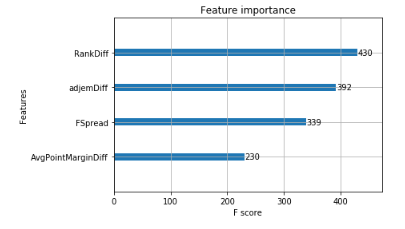

I compared this model against prior Kaggle March Madness competitions to evaluate the predictive performance. Using the four features above, I instead predicted the probability of the favorite winning. This allowed me to compare the model’s performance to the historical Kaggle leaderboard, which ranked entries based on log loss of predicted win probabilities. This model would have performed in the top 19% of all March Madness models from 2016-2019. It would have placed in the top 1% once. This confirms the model is above average.

**Betting Strategy**

After the model generated predictions, I determined the optimal betting strategy. The model is more confident if the predicted score difference is further from the spread. For example, the model could place bets on games where the prediction differs by more than 5 points compared to the spread. In the UVA example above, the model would bet when the predicted score difference is greater than 7.5 (2.5 + 5) or less than -3.5 (2.5 – 5). Although a higher threshold suggests greater confidence, the model may place bets on fewer games, resulting in lower returns.

In the 10 games from the table below, two games differ by more than 3 points. If the threshold was set to 3, the model would have bet on these two games only. 

| Season | Favorite | Score | Underdog | Score | Actual score Diff | FSpread | Predicted Score Difference | Predicted - Spread
--- | --- | --- | --- | --- | --- | --- | --- | --- | --- | ---
681 | 2013 | north carolina st. | 72 | temple | 76 | -4 | 4.0 | 4.12 | 0.12
687 | 2013 | saint louis | 57 | oregon | 74 | -17 | 4.0 | 2.19 | 1.81
689 | 2013 | gonzaga | 70 | wichita st. | 76 | -6 | 6.5 | 7.29 | 0.79
**691** | **2013** | **san diego st.** | **71** | **florida gulf coast** | **81** | **-10** | **8.0** | **11.23** | **3.23**
695 | 2013 | mississippi | 74 | la salle | 76 | -2 | 4.0 | 2.23 | 	1.77
**698** | **2013** | **miami-florida** | **61** | **marquette** | **71** | **-10** | **5.5** | **2.26** | **3.24**
700 | 2013 | indiana | 50 | syracuse | 61 | -11 | 5.0 | 5.73 | 0.73
705 | 2013 | kansas | 85 | michigan | 87 | -2 | 2.0 | 1.07 | 0.93
707 | 2013 | ohio st. | 66 | wichita st. | 70 | -4 | 4.5 | 5.73 | 1.23
709 | 2013 | florida | 59 | michigan | 79 | -20 | 3.0 | 5.79 | 2.80

I determined the optimal betting strategy using games during 2010-2013 and applied this strategy to "unseen" games from 2014-2019. I then evaluated the hypothetical winnings had various strategies been applied. I tested different thresholds of the difference between the spread and model predictions in games from 2010-2013 for six different thresholds, ranging from 0 to 5. The winnings from 2010-2013 for each threshold are summarized in the table below.

Model Difference from Spread | Amount Won/Lost | Games Bet On
--- | --- | --- 
0 | -\\$3,330 | 246
1 | -\\$2,430 | 171
2 | -\\$1,410 | 114
**3** | **\\$690** | **72**
4 | -\\$20 | 46
5 | -\\$260 | 31

The only threshold with positive returns was the optimal threshold of 3 points, which returns \\$690 from 2010-2013. Therefore, I applied this betting strategy to an "unseen" set of games from 2014-2019. When the model returned a predicted point difference that was more than 3 points different than the spread, the game was selected to bet upon and the model picked whether the favorite would cover. Consider the examples below.

(721) Louisville was the favorite against Manhattan and won 71-64, a difference of 7 points. Louisville was favored to win by 17 points, as represented by the spread. The model predicted Louisville would win by 11.7. Therefore, the model predicted Louisville would not cover. Because Louisville did not cover the spread, the model won \\$100 off \$110 bet (i.e., bet \\$110, returned \$210).

(732) Wisconsin was the favorite against American and won 75-35, a difference of 40 points. Wisconsin was favored to win by 14.5 points, as represented by the spread. The model predicted Wisconsin would win by 11.4 points. Therefore, the model predicted Wisconsin would not cover. Wisconsin won by far more than 14.5. Therefore, the model lost the full \\$110 bet (i.e., bet \$110, returned \\$0).

| Season | Favorite | Score | Underdog | Score | Actual Score Difference | Favorite Covered | FSpread | Predicted Favorite Covered | Predicted Score Difference | Amount Bet | Amount Won/Lost
--- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | ---
**721**	| **2014**	| **louisville** | **71** | **manhattan** | **64** | **7** | **0** | **17.0** | **0** | **11.75** | **\\$110** | **\\$100**
723	| 2014 | michigan st. | 93 | delaware | 78 | 15 | 0 | 15.0	 | 0 | 11.69 | \\$110 | \\$100
**732** | **2014** | **wisconsin** | **75** | **american** | **35** | **40** | **1** | **14.5** | **0** | **11.45** | **\\$110** | **-\\$110**
733 | 2014 | arizona | 68 | weber st. | 59 | 9 | 0 | 20.5 | 0 | 15.44 | \\$110 | \\$100
740 | 2014 | memphis | 71 | george washington | 66 | 5 | 1 | 4.0 | 0 | 0.63 | \\$110 | -\\$110
748 | 2014 | wichita st. | 64 | cal poly slo | 37 | 27 | 1 | 17.0 | 1 | 22.20 | \\$110 | \\$100
754 | 2014 | michigan st. | 80 | harvard | 73 | 7 | 0 | 8.5 | 0 | 3.52 | \\$110 | \\$100
772 | 2014 | michigan st. | 61 | virginia | 59 | 2 | 0 | 2.5 | 0 | -2.47 | \\$110 | \\$100
776 | 2014 | kentucky | 75 | michigan | 72 | 3 | 1 | 2.0 | 0 | -2.47 | \\$110 | -\\$110
778 | 2014 | kentucky | 74 | wisconsin | 73 | 1 | 0 | 1.5 | 0 | -2.24 | \\$110 | \\$100

**Evaluating Betting Strategy**

When I applied this strategy to games from 2014-2019, the model identified 62 games where the predicted score was more than 3 points different than the spread. I simulated placing \\$110 bets to win \$100 if the model picked correctly. If the model picked incorrectly, the full \\$110 was lost. The model placed the proper bet in 65% of games, winning \$1,580 on \\$6,820 bet. The winnings were consistently positive in all tournament years where the strategy was tested.

The model more often selected the favorite not to cover, but it was more often correct when it selected the favorite to cover. During the simulation applied to 2014-2019, the model predicted the favorite would not cover in 82% of games and would cover in 18% of games. The model was correct in 59% of the 51 games where it picked the favorite would not cover. It was correct in 91% of the 11 games where it picked the favorite would cover. The suggests the model more often identified games where the favorite is overvalued (the spread is greater than the prediction), but is more accurate in games where the model determined the favorite is undervalued (the spread is less than the prediction).

Season | Games Bet On | Model Correct | Amount Bet | Amount Won/Lost | Model Predicted Favorite Not Cover | Model Predicted Favorite Cover | Not Cover Correct | Cover Correct
--- | --- | --- | --- | --- | --- | --- | --- | --- 
2014 | 13 | 77% | \\$1,430 | \\$670 | 92% | 8% | 75% | 100%
2015 | 14 | 64% | \\$1,540 | \\$350 | 86% | 14% | 58% | 100%
2016 | 8 | 62% | \\$880 | \\$170 | 88% | 12% | 57% | 100%
2017 | 17 | 53% | \\$1,870 | \\$20 | 76% | 24% | 38% | 100%
2018 | 4 | 75% | \\$440 | \\$190 | 50% | 50% | 50% | 100%
2019 | 6 | 67% | \\$660 | \\$180 | 83% | 17% | 80% | 0%
**Total** | **62** | **65%** | **\\$6,820** | **\\$1,580** | **82%** | **18%** | **59%** | **91%**

**Additional Considerations**

Using tournaments from 2010-2013, I determined the optimal betting strategy was to bet on games where the model's prediction varied by more than 3 points from the spread. But does this strategy hold moving forward? Using tournaments from 2014-2019, the model generated hypothetical winnings at the thresholds previously tested from 2010-2013.

As shown below, the optimal threshold was still 3. Even at a threshold of 1, the model had positive returns. This suggests the model generates more accurate predictions with additional training data. As the threshold increases 0 to 5, the model became more and more accurate. The model picked 50% of games correctly at a threshold of 0 and 78% correctly at a threshold of 5. However, the number of games selected for betting also decreases as the threshold increases. When the threshold increases from 3 to 4, the decrease in the number of games bet on outweighs the incremental increase in the percentage of games picks correctly. Therefore, the optimal threshold remains 3.

My analysis suggests an above average machine learning can beat the spread. The countdown to 2021 March Madness begins now. 

Model Difference from Spread | Amount Won/Lost | Games Bet On | Model Correct
--- | --- | --- | --- 
0 | -\\$1,850 | 391 | 50%
1 | \\$310 | 232 | 53%
2 | \\$670 | 118 | 55%
**3** | **\\$1,580** | **62** | **65%**
4 | \\$1,420 | 31 | 74%
5 | \\$960 | 18 | 78%


The supporting code and sources are below.

This analysis is hypthetical and for research purposes. The Kaggle rules for this competition state "You will not: (a) use or access the NCAA® Data for any commercial, gambling, or illegal purpose."

# Sources

(in addition to Kaggle data)

Ken Pom:
    
2019	https://web.archive.org/web/20190317211809/https://kenpom.com/

2018	https://web.archive.org/web/20180311122559/https://kenpom.com/

2017	https://web.archive.org/web/20170312131016/http://kenpom.com/

2016	https://web.archive.org/web/20160314134726/http://kenpom.com/

2015	https://web.archive.org/web/20150316212936/http://kenpom.com/

2014	https://web.archive.org/web/20140318100454/http://kenpom.com/

2013	https://web.archive.org/web/20130318221134/http://kenpom.com/

2012	https://web.archive.org/web/20120311165019/http://kenpom.com/

2011	https://web.archive.org/web/20110311233233/http://www.kenpom.com/

2010	https://web.archive.org/web/20100304023540/http://kenpom.com/rate.php

2009	https://web.archive.org/web/20090315085050/http://kenpom.com/rate.php

Prior to 2009 (only used for training, not validation): Downloaded directly from Ken Pom website (https://kenpom.com/index.php) as Wayback data are thin.

Spread data:

http://www.thepredictiontracker.com/ncaaresults.php 

(e.g., http://www.thepredictiontracker.com/ncaabb18.csv)

# Supporting code and details

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error

import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

**Tournament games**

In [ ]:
tourney_results = pd.read_csv('../input/march-madness-analytics-2020/2020DataFiles/2020DataFiles/2020-Mens-Data/MDataFiles_Stage1/MNCAATourneyDetailedResults.csv')
tourney_results = tourney_results[['Season','WTeamID','WScore','LTeamID','LScore']]
tourney_results

**Regular season stats**

In [ ]:
regular_results = pd.read_csv('../input/march-madness-analytics-2020/2020DataFiles/2020DataFiles/2020-Mens-Data/MDataFiles_Stage1/MRegularSeasonDetailedResults.csv')
regular_results = regular_results[['Season', 'DayNum', 'LTeamID', 'LScore', 'WTeamID', 'WScore']].copy()
regular_results_swap = regular_results
regular_results

In [ ]:
regular_results.columns = [x.replace('W','T1_').replace('L','T2_') for x in list(regular_results.columns)]
regular_results_swap.columns = [x.replace('L','T1_').replace('W','T2_') for x in list(regular_results.columns)]
regular_data = pd.concat([regular_results, regular_results_swap]).sort_index().reset_index(drop = True)

In [ ]:
# data are duplicated, so only need to take T1_TeamID average, T2 will be average points allowed
season_statistics = regular_data.groupby(['Season','T1_TeamID'])['T1_Score','T2_Score'].agg(np.mean)
season_statistics.columns = [''.join(col).strip() for col in season_statistics.columns.values]
season_statistics = season_statistics.reset_index()
season_statistics.rename(columns={'T1_TeamID':'TeamID','T1_Score':'AvgPtsScored','T2_Score':'AvgPtsAllowed'}, inplace=True)
season_statistics

**Ken Pom data**

In [ ]:
kp_df=[]
years_list = [2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002]
for year in years_list:
    temp_kp_df = pd.read_csv("../input/kenpomeffiencydata/KP" + str(year) + ".csv") 
    temp_kp_df = temp_kp_df[['team','conf','adjem','adjo','adjd','luck']]
    temp_kp_df['Season'] = year
    year_last = year   
    if year==2019:
        kp_df = temp_kp_df
    else:
        kp_df = kp_df.append(temp_kp_df)

In [ ]:
kp_df['team'] = kp_df['team'].str.lower()

In [ ]:
# these teams are in the tournament historically and don't match to the team names file without these fixes
kp_df.loc[kp_df['team']=="st. louis","team"] = "saint louis"
kp_df.loc[kp_df['team']=="cal st. bakersfield","team"] = "csu bakersfield"
kp_df.loc[kp_df['team']=="illinois chicago","team"] = "illinois-chicago"
kp_df.loc[kp_df['team']=="texas a&m corpus chris","team"] = "a&m-corpus chris"
kp_df.loc[kp_df['team']=="texas a&m corpus chri","team"] = "a&m-corpus chris"
kp_df.loc[kp_df['team']=="nevada las vegas","team"] = "unlv"
kp_df.loc[kp_df['team']=="arkansas pine bluff","team"] = "ark pine bluff"
kp_df.loc[kp_df['team']=="mississippi valley st.","team"] = "miss valley st."
kp_df.loc[kp_df['team']=="arkansas little rock","team"] = "ark little rock"
kp_df.loc[kp_df['team']=="texas el paso","team"] = "texas-el paso"
kp_df.loc[kp_df['team']=="wisconsin green bay","team"] = "wisconsin-green bay"
kp_df.loc[kp_df['team']=="wisconsin milwaukee","team"] = "wisconsin-milwaukee"
kp_df.loc[kp_df['team']=="md baltimore county","team"] = "maryland-baltimore county"
kp_df.loc[kp_df['team']=="winston salem st.","team"] = "winston-salem-state"
kp_df.loc[kp_df['team']=="southwest missouri st.","team"] = "southwest missouri state"

In [ ]:
teams_df = pd.read_csv('../input/march-madness-analytics-2020/2020DataFiles/2020DataFiles/2020-Mens-Data/MDataFiles_Stage1/MTeamSpellings.csv', sep='\,', engine='python')

In [ ]:
kp_df = pd.merge(kp_df, teams_df, left_on=['team'], right_on = ['TeamNameSpelling'], how='left')
kp_df = kp_df.drop(['TeamNameSpelling'], axis=1)

In [ ]:
# these teams haven't played in MM, fine that they don't match
temp = kp_df[kp_df['TeamID'].isna()]
temp['team'].value_counts(dropna=False)

In [ ]:
kp_df['Season'].value_counts(dropna=False)

In [ ]:
kp_df.head()

**Spread data**

In [ ]:
spread_df=[]
years_list = [18,17,16,15,14,13,12,11,10,'09','08','07','06','05','04','03']
year_int = 2019
for year in years_list:
    #Note: 18 refers to 2019 and so on
    temp_spread_df = pd.read_csv("../input/spread-data-03-to-18/ncaabb" + str(year) + ".csv")
    temp_spread_df['Season'] = year_int
    year_last = year
    year_int = year_int-1    
    if year==18:
        spread_df = temp_spread_df
    else:
        spread_df = spread_df.append(temp_spread_df)
    
spread_df = spread_df[['Season','line','home','hscore','road','rscore']]

spread_df = spread_df[(spread_df['hscore'] != ".") & (spread_df['rscore'] != ".") & (spread_df['line'] != ".")]
spread_df = spread_df.dropna()

spread_df['rscore'] = spread_df['rscore'].astype(float)
spread_df['hscore'] = spread_df['hscore'].astype(float)
spread_df['line'] = spread_df['line'].astype(float)

spread_df['rscore'] = spread_df['rscore'].astype(int)
spread_df['hscore'] = spread_df['hscore'].astype(int)
spread_df

In [ ]:
# make teams W and L consistent with tourney data
home_team_wins = spread_df[spread_df['hscore']>spread_df['rscore']]
home_team_wins.rename(columns={'home':'WTeam','hscore':'WScore','road':'LTeam','rscore':'LScore'}, inplace=True)                          

away_team_wins = spread_df[spread_df['hscore']<spread_df['rscore']]
away_team_wins.rename(columns={'home':'LTeam','hscore':'LScore','road':'WTeam','rscore':'WScore'}, inplace=True)  
#line (aka spread) is in terms of home team, multiply by -1 if the away team wins
away_team_wins['line'] = away_team_wins['line']*-1

spread_df = home_team_wins.append(away_team_wins)
spread_df.rename(columns={'line':'WSpread'}, inplace=True)   
spread_df

In [ ]:
spread_df['WTeam'] = spread_df['WTeam'].str.lower()
spread_df['LTeam'] = spread_df['LTeam'].str.lower()

In [ ]:
team_list = ['WTeam','LTeam']
for team in team_list:
    spread_df = pd.merge(spread_df, teams_df, left_on=[team], right_on = ['TeamNameSpelling'], how='left')
    spread_df.rename(columns={'TeamID': team+'ID'}, inplace=True)
    spread_df = spread_df.drop(['TeamNameSpelling'], axis=1)

In [ ]:
spread_df.head()

In [ ]:
spread_df['Season'].value_counts(dropna=False)

**Rankings data**

In [ ]:
rank_df = pd.read_csv('../input/march-madness-analytics-2020/2020DataFiles/2020DataFiles/2020-Mens-Data/MDataFiles_Stage1/MMasseyOrdinals.csv')
# 133 is last day of regular season
rank_df = rank_df.loc[rank_df['RankingDayNum'] == 133]
rank_end_df = rank_df.groupby(['Season','TeamID'])['OrdinalRank'].agg(pd.np.mean).reset_index()
rank_end_df.rename(columns={'OrdinalRank': 'Rank'}, inplace=True)
rank_end_df

# Combine data

In [ ]:
tourney_results.head()

In [ ]:
spread_df.head()

In [ ]:
season_statistics.head()

In [ ]:
kp_df.head()

In [ ]:
rank_end_df.head()

In [ ]:
combined_data = pd.merge(tourney_results, spread_df, on = ['Season','WTeamID','WScore','LTeamID','LScore'], how = 'left')
combined_data.tail(5)

In [ ]:
reg_W = season_statistics[['Season','TeamID','AvgPtsScored','AvgPtsAllowed']].copy()
reg_L = season_statistics[['Season','TeamID','AvgPtsScored','AvgPtsAllowed']].copy()
reg_W.columns = ['Season','WTeamID','WAvgPtsScored','WAvgPtsAllowed']
reg_L.columns = ['Season','LTeamID','LAvgPtsScored','LAvgPtsAllowed']

combined_data = pd.merge(combined_data, reg_W, on = ['Season', 'WTeamID'], how = 'left')
combined_data = pd.merge(combined_data, reg_L, on = ['Season', 'LTeamID'], how = 'left')
combined_data

In [ ]:
kp_W = kp_df[['Season','TeamID','adjem']].copy()
kp_L = kp_df[['Season','TeamID','adjem']].copy()
kp_W.columns = ['Season','WTeamID','Wadjem']
kp_L.columns = ['Season','LTeamID','Ladjem']

combined_data = pd.merge(combined_data, kp_W, on = ['Season', 'WTeamID'], how = 'left')
combined_data = pd.merge(combined_data, kp_L, on = ['Season', 'LTeamID'], how = 'left')
combined_data

In [ ]:
rank_W = rank_end_df[['Season','TeamID','Rank']].copy()
rank_L = rank_end_df[['Season','TeamID','Rank']].copy()
rank_W.columns = ['Season','WTeamID','WRank']
rank_L.columns = ['Season','LTeamID','LRank']

combined_data = pd.merge(combined_data, rank_W, on = ['Season', 'WTeamID'], how = 'left')
combined_data = pd.merge(combined_data, rank_L, on = ['Season', 'LTeamID'], how = 'left')
combined_data

**Having features relative to winning team would cause a data leak since the features incorporate the outcome**

We instead make the variables relevant the favorite team. If WSpread is positive, it means the favorite won. If WSpread is negative, the underdog won.

In [ ]:
#we'll also include 0 in this one:
favorite_won = combined_data[combined_data['WSpread']>-0.01]
favorite_won

In [ ]:
favorite_won.columns = [x.replace('W','F').replace('L','U') for x in list(favorite_won.columns)]
favorite_won

In [ ]:
underdog_won = combined_data[combined_data['WSpread']<0]
underdog_won.columns = [x.replace('W','U').replace('L','F') for x in list(underdog_won.columns)]
#The winning spread is related to the underdog, swap by -1 to make relative to favorite
underdog_won['FSpread'] = underdog_won['USpread']*-1
underdog_won = underdog_won.drop(['USpread'], axis=1)
underdog_won

In [ ]:
combined_data = favorite_won.append(underdog_won)
combined_data

In [ ]:
combined_data['Season'].value_counts(dropna=False).sort_index()

In [ ]:
combined_data['FAvgPointMargin'] = combined_data['FAvgPtsScored']-combined_data['FAvgPtsAllowed']
combined_data['UAvgPointMargin'] = combined_data['UAvgPtsScored']-combined_data['UAvgPtsAllowed']

In [ ]:
# make variables we will use as features differences (cuts down the number of features to potentially generalize better)
varlist = [
'AvgPointMargin',
'adjem',
'Rank'
]
for var in varlist:
    combined_data[var+'Diff'] = combined_data['F'+var]-combined_data['U'+var]

In [ ]:
# add target variables:
combined_data['ScoreDiff'] = combined_data['FScore']-combined_data['UScore']

combined_data['FavoriteCovered'] = 0
combined_data.loc[combined_data['FSpread']<combined_data['ScoreDiff'], 'FavoriteCovered'] =  1

combined_data['FWon'] = 0
combined_data.loc[combined_data['FScore']>combined_data['UScore'], 'FWon'] = 1

# Train model to predict wins and compare to historical Kaggle leaderboard

In [ ]:
features = [
'AvgPointMarginDiff',
'adjemDiff',
'RankDiff',
'FSpread'
]

In [ ]:
def predict(df,season,features_array,dep_var):
    # train on prior seasons, validate on current season
    train_df = df[df['Season']<season]
    valid_df = df[df['Season']==season]

    X_train = train_df[features_array].reset_index(drop=True)
    y_train = train_df[dep_var].reset_index(drop=True)

    X_valid = valid_df[features_array].reset_index(drop=True)
    y_valid = valid_df[dep_var].reset_index(drop=True)
    
    X_train_xgb = xgb.DMatrix(X_train, label = y_train)
    X_valid_xgb = xgb.DMatrix(X_valid)

    param = {'max_depth':3,'eta':.001,'seed':201,'objective':'binary:logistic',
             'eval_metric':'mae', 'gamma':0, 'nthread':-1}

    num_round=2000
    
    xgb_train = xgb.train(param, X_train_xgb, num_round)   
    pred = xgb_train.predict(X_valid_xgb)
        
    return pred, y_valid, valid_df, xgb, xgb_train

In [ ]:
#this is the scoring metric for Kaggle competitions
def LogLoss(predictions, realizations):
    predictions_use = predictions.clip(0)
    realizations_use = realizations.clip(0)
    LogLoss = -np.mean( (realizations_use * np.log(predictions_use)) + 
                        (1 - realizations_use) * np.log(1 - predictions_use) )
    return LogLoss

In [ ]:
#evaluate log loss during the last 4 seasons
losses = 0
seasons = [2016,2017,2018,2019]
for season in seasons:
    pred, y_valid, valid_df, xgb, xgb_train = predict(combined_data,season,features,'FWon')    
    loss = LogLoss(pred, y_valid)
        
    print("Season",season,"valid:",loss)
    losses = losses+loss
    
losses_avg = losses/4
print("All seasons :",losses_avg)

Average (2016-2019): 19th percentile

2016: 1st percentile

2017: 29th percentile

2018: 31st percentile

2019: 14th percentile


Source: Kaggle leaderboards

Backup:

2016: 9/597

2017: 126/441

2018: 292/933

2019: 122/866

# Train model to predict point difference

We will train the model. We will then determine an optimal betting strategy during 2010-2013. We will then simulate this optimal betting strategy during 2014-2019. 

In [ ]:
combined_data

From: https://www.thelines.com/betting/point-spread/

"Point spreads are usually set with -110 odds, but pricing often fluctuates at online sportsbooks. This is the sportsbook operators’ house edge. The odds guarantee the sportsbook operator will see a little money over time. When the odds are set at -110, the bettor must wager 110 to win 100 (or 11 to win 10)."

Here, we will always place 110 bet and  win 100

In [ ]:
def predict(df,season,features_array,dep_var):
    train_df = df[df['Season']<season]
    valid_df = df[df['Season']==season]

    X_train = train_df[features_array].reset_index(drop=True)
    y_train = train_df[dep_var].reset_index(drop=True)

    X_valid = valid_df[features_array].reset_index(drop=True)
    y_valid = valid_df[dep_var].reset_index(drop=True)
    
    X_train_xgb = xgb.DMatrix(X_train, label = y_train)
    X_valid_xgb = xgb.DMatrix(X_valid)

    param = {'max_depth':3,'eta':.01,'seed':201,'objective':'reg:squarederror',
             'eval_metric':'mae', 'gamma':1, 'nthread':-1}

    num_round=200
            
    xgb_train = xgb.train(param, X_train_xgb, num_round)   
    pred = xgb_train.predict(X_valid_xgb)
        
    return pred, y_valid, valid_df, xgb, xgb_train

In [ ]:
#2009 is the first season we have without a data leak in Ken Pom. 
#We still include the training data prior to 2009 that has a leak as the validation performance is better with more data, even if some of the years of training data have Ken Pom leaks
#We use all prior years and validate on each season since 2009

seasons = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
for season in seasons:
    # train model using all seasons in the past, validate on current season  
    pred, y_valid, valid_df, xgb, xgb_train = predict(combined_data,season,features,'ScoreDiff')  
    # mean average error is average difference between predicted and actual score difference
    mae = mean_absolute_error(pred, y_valid)
    print(season,'MAE',mae)
    
    valid_df['PredSpread'] = pd.array(pred)

    valid_df['PredFavoriteCovered'] = 0
    valid_df.loc[valid_df['PredSpread']>valid_df['FSpread'],'PredFavoriteCovered'] = 1     
    
    valid_df['DollarsBet'] = 110
    #wrong: lose $110
    valid_df['DollarsWonLost'] = -110
    #right: gain $100
    valid_df.loc[(valid_df['FavoriteCovered']==1) & (valid_df['PredFavoriteCovered']==1),'DollarsWonLost'] = 100   
    valid_df.loc[(valid_df['FavoriteCovered']==0) & (valid_df['PredFavoriteCovered']==0),'DollarsWonLost'] = 100 

    # We exclude 2009 from the simulation because the MAE is high. We don't have enough training data.
    if season==2010:
        all_validation_bets = valid_df
    if season>2010:
        all_validation_bets = all_validation_bets.append(valid_df)

In [ ]:
# this is the feature importance from last iteration above
xgb.plot_importance(xgb_train)
plt.rcParams['figure.figsize'] = [20, 20]
plt.show()

In [ ]:
all_validation_bets.shape

In [ ]:
# What is optimal threshold to cutoff in difference? 
# Use 2010-2013 to determine threshold and then test strategy in 2014-2019
train = all_validation_bets[all_validation_bets['Season']<2014]
test = all_validation_bets[all_validation_bets['Season']>2013]

In the 10 games below, we can see 2 differ by more than 3 points. In a strategy where we set the threshold at 3, we would bet on these two games and not bet on the other 8. More specifically, we would bet on San Diego State v Florida Gulf Coast and UMiami v Marquette. If we set the threshold at 1, we would bet on 6 out of 10 of the games.

In [ ]:
train['Difference'] = abs(train['PredSpread']-train['FSpread'])
train[['Season','FTeam','FScore','UTeam','UScore','ScoreDiff','FSpread','PredSpread','Difference']].tail(10)

In [ ]:
# keep games where we differ from spread by at least 3
train0 = train[abs(train['PredSpread']-train['FSpread'])>0]
train1 = train[abs(train['PredSpread']-train['FSpread'])>1]
train2 = train[abs(train['PredSpread']-train['FSpread'])>2]
train3 = train[abs(train['PredSpread']-train['FSpread'])>3]
train4 = train[abs(train['PredSpread']-train['FSpread'])>4]
train5 = train[abs(train['PredSpread']-train['FSpread'])>5]

The optimal threshold is 3

In [ ]:
for i in range(0,6):
    train_temp = train[abs(train['PredSpread']-train['FSpread'])>i]
    train_temp['DifferenceVspread'] = i
    train_temp['GamesBetOn'] = 1
    if i==0:
        appended = train_temp
    else:
        appended = appended.append(train_temp)
        
summary_df = appended.groupby(['DifferenceVspread'])['DollarsWonLost','GamesBetOn'].agg(np.sum).reset_index()
summary_df = summary_df.style.format({
    'DollarsWonLost': '$ {:,.0f}'.format
})
summary_df

Does this same strategy hold into the future? Let's see the optimal threshold if we include all seasons. This same strategy does hold into the future.

In [ ]:
for i in range(0,6):
    test_temp = test[abs(test['PredSpread']-test['FSpread'])>i]
    test_temp['DifferenceVspread'] = i
    test_temp['GamesBetOn'] = 1
    test_temp['ModelCorrect'] = test_temp['DollarsWonLost']==100
    if i==0:
        appended = test_temp
    else:
        appended = appended.append(test_temp)
        
summary_df = appended.groupby(['DifferenceVspread'])['DollarsWonLost','GamesBetOn','ModelCorrect'].agg(np.sum).reset_index()
summary_df['ModelCorrect'] = summary_df['ModelCorrect'] / summary_df['GamesBetOn']
summary_df = summary_df.style.format({
    'DollarsWonLost': '$ {:,.0f}'.format,
    'ModelCorrect': '{:,.0%}'.format
})
summary_df

How many games do we bet on in the test set (2014-2019)?

In [ ]:
test.shape

In [ ]:
test = test[abs(test['PredSpread']-test['FSpread'])>3]

In [ ]:
# we bet on 62 out of 391 games
test.shape

In [ ]:
62/391

Let's evaluate our model accuracy:

In [ ]:
test['ModelCorrect'] = 0
test.loc[test['DollarsWonLost']>0,'ModelCorrect'] = 1 
test['Seasons'] = "2014-2019"
summary_df = test.groupby(['Seasons'])['ModelCorrect'].agg(np.mean).reset_index()
summary_df = summary_df.style.format({
    'ModelCorrect': '{:,.0%}'.format
})
summary_df

In [ ]:
test['ModelCorrect'] = 0
test.loc[test['DollarsWonLost']>0,'ModelCorrect'] = 1 

summary_df = test.groupby(['Season'])['ModelCorrect'].agg(np.mean).reset_index()
summary_df = summary_df.style.format({
    'ModelCorrect': '{:,.0%}'.format
})
summary_df

Let's look at a few examples of how the above works to unpack this a bit. 

(721) Louisville was the favorite against Manhattan and won 71-64, a difference of 7 points. Louisville was favored to win by 17 points, as represented by the spread. The model predicted Louisville would win by 11.7. Therefore, the model predicted Louisville would not cover. Because Louisville did not cover the spread, the model won \\$100 off \$110 bet (i.e., bet \\$110, returned \$210).

(732) Wisconsin was the favorite against American and won 75-35, a difference of 40 points. Wisconsin was favored to win by 14.5 points, as represented by the spread. The model predicted Wisconsin would win by 11.4 points. Therefore, the model predicted Wisconsin would not cover. Wisconsin won by far more than 14.5. Therefore, the model lost the full \\$110 bet (i.e., bet \$110, returned \\$0).

In [ ]:
test[['Season','FTeam','FScore','UTeam','UScore','ScoreDiff','FavoriteCovered','FSpread','PredFavoriteCovered','PredSpread','DollarsBet','DollarsWonLost']].head(10)

# Evaluate bets

In [ ]:
test['GamesBetOn'] = 1

test['NotCoverCorrect'] = np.where((test['PredFavoriteCovered']==0) & (test['FavoriteCovered']==0), 1, 0)
test['CoverCorrect'] = np.where((test['PredFavoriteCovered']==1) & (test['FavoriteCovered']==1), 1, 0)

test_all = test.copy()
test_all['Season'] = 'Total'
test_appended = test.append(test_all)

In [ ]:
summary_df = test_appended.groupby(['Season'])['GamesBetOn','ModelCorrect','DollarsBet','DollarsWonLost','PredFavoriteCovered','NotCoverCorrect','CoverCorrect'].agg(np.sum).reset_index()

summary_df['ModelCorrect'] = summary_df['ModelCorrect']/summary_df['GamesBetOn']
summary_df['TookCover'] = summary_df['PredFavoriteCovered']/summary_df['GamesBetOn']
summary_df['TookNotCover'] = 1-summary_df['TookCover'] 

summary_df['CoverCorrect'] = summary_df['CoverCorrect']/summary_df['PredFavoriteCovered']
summary_df['NotCoverCorrect'] = summary_df['NotCoverCorrect']/(summary_df['GamesBetOn']-summary_df['PredFavoriteCovered'])

summary_df = summary_df[['Season','GamesBetOn','ModelCorrect','DollarsBet','DollarsWonLost','TookNotCover','TookCover','NotCoverCorrect','CoverCorrect']]

summary_df = summary_df.style.format({
    'ModelCorrect': '{:,.0%}'.format,
    'TookCover': '{:,.0%}'.format,
    'TookNotCover': '{:,.0%}'.format,
    'CoverCorrect': '{:,.0%}'.format,
    'NotCoverCorrect': '{:,.0%}'.format,
    'DollarsBet': '$ {:,.0f}'.format,
    'DollarsWonLost': '$ {:,.0f}'.format
})

summary_df

In [ ]:
summary_df = test_appended.groupby(['Season'])['GamesBetOn','ModelCorrect','DollarsBet','DollarsWonLost','PredFavoriteCovered','NotCoverCorrect','CoverCorrect'].agg(np.sum).reset_index()

summary_df['ModelCorrect'] = summary_df['ModelCorrect']
summary_df['TookCover'] = summary_df['PredFavoriteCovered']
summary_df['TookNotCover'] = summary_df['GamesBetOn']-summary_df['TookCover'] 

summary_df = summary_df[['Season','GamesBetOn','ModelCorrect','TookNotCover','TookCover','NotCoverCorrect','CoverCorrect']]

summary_df = summary_df.style.format({
    'DollarsBet': '$ {:,.0f}'.format,
    'DollarsWonLost': '$ {:,.0f}'.format
})

summary_df

# Game-level detail for bets placed

In [ ]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [ ]:
test[['Season','FTeam','FScore','UTeam','UScore','ScoreDiff','FSpread','PredSpread','PredFavoriteCovered','DollarsWonLost']]